In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 1: Load Data
# Replace with the correct file paths
train_file = '/content/sample_data/data/test_data.xlsx'
test_file = '/content/sample_data/data/train_data.xlsx'

train_data = pd.read_excel(train_file)
test_data = pd.read_excel(test_file)

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# Basic Info
print("Training Data Overview:")
print(train_data.info())
print("\nTest Data Overview:")
print(test_data.info())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          8455 non-null   int64         
 1   transaction_date     8455 non-null   datetime64[ns]
 2   sub_grade            8455 non-null   object        
 3   term                 8455 non-null   object        
 4   home_ownership       8455 non-null   object        
 5   cibil_score          8455 non-null   int64         
 6   total_no_of_acc      8455 non-null   int64         
 7   annual_inc           8455 non-null   float64       
 8   int_rate             8455 non-null   float64       
 9   purpose              8455 non-null   object        
 10  loan_amnt            8455 non-null   int64         
 11  application_type     8455 non-null   object        
 12  installment          8455 non-null   float64       
 13  verificat

In [ ]:
# Checking for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [ ]:
sns.countplot(x='Target', data=train_data)
plt.title('Target Variable Distribution')
plt.show()

ValueError: Could not interpret value `Target` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Step 3: Data Preprocessing
# Handle missing values
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

# Encode categorical variables
categorical_cols = train_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# Separate features and target
X = train_data.drop(columns=['Target'])
y = train_data['Target']

In [ ]:
# Step 4: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Step 5: Split data
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Step 7: Model Building
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

In [ ]:
val_predictions = rf_model.predict(X_val_scaled)
print("Classification Report:\n", classification_report(y_val, val_predictions))


In [ ]:
roc_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)

In [ ]:
fpr, tpr, _ = roc_curve(y_val, rf_model.predict_proba(X_val_scaled)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Step 9: Test Set Evaluation
test_X = test_data.drop(columns=['Target'])
test_y = test_data['Target']

test_X_scaled = scaler.transform(test_X)
test_predictions = rf_model.predict(test_X_scaled)

In [ ]:
print("Test Set Classification Report:\n", classification_report(test_y, test_predictions))

In [ ]:
import joblib
joblib.dump(rf_model, 'loan_default_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          8455 non-null   int64         
 1   transaction_date     8455 non-null   datetime64[ns]
 2   sub_grade            8455 non-null   object        
 3   term                 8455 non-null   object        
 4   home_ownership       8455 non-null   object        
 5   cibil_score          8455 non-null   int64         
 6   total_no_of_acc      8455 non-null   int64         
 7   annual_inc           8455 non-null   float64       
 8   int_rate             8455 non-null   float64       
 9   purpose              8455 non-null   object        
 10  loan_amnt            8455 non-null   int64         
 11  application_type     8455 non-null   object        
 12  installment          8455 non-null   float64       
 13  verificat

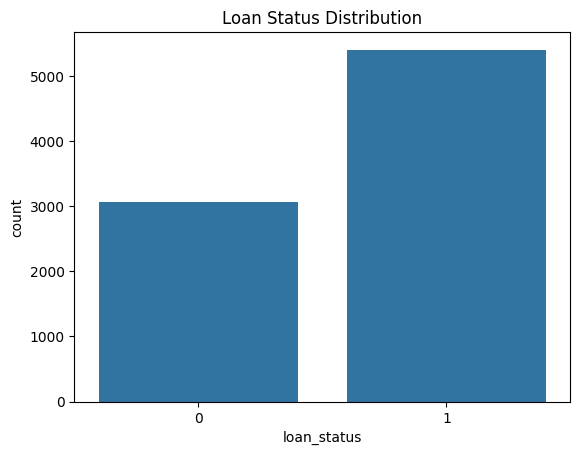

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      1099
           1       0.72      0.77      0.74      1061

    accuracy                           0.74      2160
   macro avg       0.74      0.74      0.74      2160
weighted avg       0.74      0.74      0.74      2160

ROC-AUC Score: 0.8203889406786565


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load Data
# Upload files to Colab and provide correct file paths
#from google.colab import files
#uploaded = files.upload()

train_file = '/content/sample_data/data/test_data.xlsx'  # Update with actual file name
test_file = '/content/sample_data/data/train_data.xlsx'    # Update with actual file name

train_data = pd.read_excel(train_file)
test_data = pd.read_excel(test_file)

# Step 2: Exploratory Data Analysis (EDA)
# Basic Info
print("Training Data Overview:")
print(train_data.info())
print("\nTest Data Overview:")
print(test_data.info())

# Checking for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

# Target Variable Distribution
if 'loan_status' in train_data.columns:
    sns.countplot(x='loan_status', data=train_data)
    plt.title('Loan Status Distribution')
    plt.show()
else:
    print("Error: 'loan_status' column not found in the dataset.")

# Step 3: Data Preprocessing
# Handle missing values
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
test_data.fillna(test_data.median(numeric_only=True), inplace=True)

# Encode categorical variables
categorical_cols = train_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    # Fit on the combined unique values from both train and test data
    le.fit(pd.concat([train_data[col], test_data[col]], ignore_index=True).astype(str).unique())
    train_data[col] = le.transform(train_data[col].astype(str))
    if col in test_data.columns:
        test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# Feature Engineering
# Convert transaction_date to datetime and extract features
for df in [train_data, test_data]:
    if 'transaction_date' in df.columns:
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df['transaction_month'] = df['transaction_date'].dt.month
        df['days_since_transaction'] = (pd.Timestamp.now() - df['transaction_date']).dt.days
        df.drop('transaction_date', axis=1, inplace=True)

# Create debt-to-income ratio
for df in [train_data, test_data]:
    if 'loan_amnt' in df.columns and 'annual_inc' in df.columns:
        df['debt_to_income'] = df['loan_amnt'] / (df['annual_inc'] + 1e-6)

# Separate features and target
X = train_data.drop(columns=['loan_status', 'customer_id'])
y = train_data['loan_status']

# Step 4: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Split data
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 7: Model Building
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 8: Model Evaluation
val_predictions = rf_model.predict(X_val_scaled)
print("Classification Report:\n", classification_report(y_val, val_predictions))

# ROC-AUC
roc_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)




# model 2


Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          8455 non-null   int64         
 1   transaction_date     8455 non-null   datetime64[ns]
 2   sub_grade            8455 non-null   object        
 3   term                 8455 non-null   object        
 4   home_ownership       8455 non-null   object        
 5   cibil_score          8455 non-null   int64         
 6   total_no_of_acc      8455 non-null   int64         
 7   annual_inc           8455 non-null   float64       
 8   int_rate             8455 non-null   float64       
 9   purpose              8455 non-null   object        
 10  loan_amnt            8455 non-null   int64         
 11  application_type     8455 non-null   object        
 12  installment          8455 non-null   float64       
 13  verificat

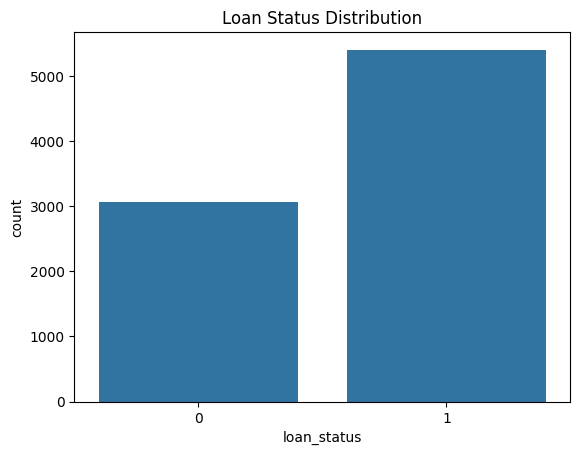

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:38:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      1099
           1       0.72      0.78      0.75      1061

    accuracy                           0.74      2160
   macro avg       0.74      0.74      0.74      2160
weighted avg       0.74      0.74      0.74      2160

ROC-AUC Score: 0.8240144626380421


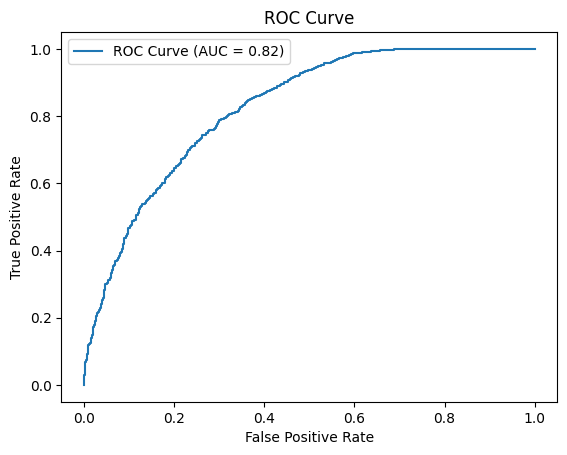

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.51      0.46     29689
           1       0.81      0.74      0.78     84016

    accuracy                           0.68    113705
   macro avg       0.61      0.63      0.62    113705
weighted avg       0.71      0.68      0.69    113705



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib

# Step 1: Load Data
# Upload files to Colab and provide correct file paths

train_file = '/content/sample_data/data/test_data.xlsx'  # Update with actual file name
test_file = '/content/sample_data/data/train_data.xlsx'    # Update with actual file name

train_data = pd.read_excel(train_file)
test_data = pd.read_excel(test_file)

# Step 2: Exploratory Data Analysis (EDA)
# Basic Info
print("Training Data Overview:")
print(train_data.info())
print("\nTest Data Overview:")
print(test_data.info())

# Checking for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

# Target Variable Distribution
if 'loan_status' in train_data.columns:
    sns.countplot(x='loan_status', data=train_data)
    plt.title('Loan Status Distribution')
    plt.show()
else:
    print("Error: 'loan_status' column not found in the dataset.")

# Step 3: Data Preprocessing
# Handle missing values
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
test_data.fillna(test_data.median(numeric_only=True), inplace=True)

# Encode categorical variables
categorical_cols = train_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    # Fit on the combined unique values from both train and test data
    le.fit(pd.concat([train_data[col], test_data[col]], ignore_index=True).astype(str).unique())
    train_data[col] = le.transform(train_data[col].astype(str))
    # Check if the column exists in test_data before transforming
    if col in test_data.columns:
        # Handle unknown values in test data
        test_data[col] = test_data[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    label_encoders[col] = le

# Feature Engineering
# Convert transaction_date to datetime and extract features
for df in [train_data, test_data]:
    if 'transaction_date' in df.columns:
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df['transaction_month'] = df['transaction_date'].dt.month
        df['days_since_transaction'] = (pd.Timestamp.now() - df['transaction_date']).dt.days
        df.drop('transaction_date', axis=1, inplace=True)

# Create debt-to-income ratio
for df in [train_data, test_data]:
    if 'loan_amnt' in df.columns and 'annual_inc' in df.columns:
        df['debt_to_income'] = df['loan_amnt'] / (df['annual_inc'] + 1e-6)

# Separate features and target
X = train_data.drop(columns=['loan_status', 'customer_id'])
y = train_data['loan_status']

# Step 4: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Split data
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 7: Model Building with XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Model
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 8: Model Evaluation
val_predictions = best_xgb_model.predict(X_val_scaled)
print("Classification Report:\n", classification_report(y_val, val_predictions))

# ROC-AUC
roc_auc = roc_auc_score(y_val, best_xgb_model.predict_proba(X_val_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_val, best_xgb_model.predict_proba(X_val_scaled)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 9: Test Set Evaluation
if 'loan_status' in test_data.columns:
    test_X = test_data.drop(columns=['loan_status', 'customer_id'])
    test_y = test_data['loan_status']
else:
    test_X = test_data.drop(columns=['customer_id'])
    test_y = None

# Scale test set
test_X_scaled = scaler.transform(test_X)

test_predictions = best_xgb_model.predict(test_X_scaled)
if test_y is not None:
    print("Test Set Classification Report:\n", classification_report(test_y, test_predictions))